In [1]:
%autosave 10
import time

Autosaving every 10 seconds


In [2]:
import pandas as pd
file_responses = pd.read_excel("#TaxDirection (Responses).xlsx")

# Developing Numeric Columns

In [3]:
# Financial Weights are in per decas and NOT per cents

### GPT: Assuming 'Your financial allocation for Problem (in $)' column contains numerical values


file_responses['''Your financial allocation for Problem 1:
Mention the percentage of your Tax Amount which you wish the Government would allocate through their annual budget, to implement a specific solution for your 1st problem.'''] = pd.to_numeric(file_responses['''Your financial allocation for Problem 1:
Mention the percentage of your Tax Amount which you wish the Government would allocate through their annual budget, to implement a specific solution for your 1st problem.'''], errors='coerce').fillna(0)


file_responses['''Your financial allocation for Problem 2:
Mention the percentage of your Tax Amount which you wish the Government would allocate through their annual budget, to implement a solution specifically to your 2nd problem.'''] = pd.to_numeric(file_responses['''Your financial allocation for Problem 2:
Mention the percentage of your Tax Amount which you wish the Government would allocate through their annual budget, to implement a solution specifically to your 2nd problem.'''], errors='coerce').fillna(0)


file_responses['''Your financial allocation for Problem 3:
Mention the percentage of your Tax Amount which you wish the Government would allocate through their annual budget, to implement a solution specifically to your 3rd problem.'''] = pd.to_numeric(file_responses['''Your financial allocation for Problem 3:
Mention the percentage of your Tax Amount which you wish the Government would allocate through their annual budget, to implement a solution specifically to your 3rd problem.'''], errors='coerce').fillna(0)


file_responses['''How much was your latest Tax payment (in U$D) ?

Please try to be as accurate as possible:
Eg.: If your last tax amount was INR 25,785/-; then convert it in U$D and enter only the amount as: 310.

If you have never paid tax, consider putting in a realistic donation amount which wish to contribute towards helping yourself obtain the desired relief.'''
] = pd.to_numeric(file_responses['''How much was your latest Tax payment (in U$D) ?

Please try to be as accurate as possible:
Eg.: If your last tax amount was INR 25,785/-; then convert it in U$D and enter only the amount as: 310.

If you have never paid tax, consider putting in a realistic donation amount which wish to contribute towards helping yourself obtain the desired relief.'''
], errors='coerce').fillna(0)






# Adding a new column 'Total Allocation' by summing specific columns by their names
file_responses['Total Allocation'] = file_responses[['''Your financial allocation for Problem 1:
Mention the percentage of your Tax Amount which you wish the Government would allocate through their annual budget, to implement a specific solution for your 1st problem.''' , '''Your financial allocation for Problem 2:
Mention the percentage of your Tax Amount which you wish the Government would allocate through their annual budget, to implement a solution specifically to your 2nd problem.''' , '''Your financial allocation for Problem 3:
Mention the percentage of your Tax Amount which you wish the Government would allocate through their annual budget, to implement a solution specifically to your 3rd problem.''']].apply(lambda x: x.clip(lower=10)).sum(axis=1)






# Creating 'Financial Weight' column by dividing 'Your financial allocation for Problem 1' by 'Total Allocation' and multiplying this with the assigned decage (similar to percentage but for 10) for Problem 1
file_responses['Financial Token Weight for Problem 1'] = file_responses['''How much was your latest Tax payment (in U$D) ?

Please try to be as accurate as possible:
Eg.: If your last tax amount was INR 25,785/-; then convert it in U$D and enter only the amount as: 310.

If you have never paid tax, consider putting in a realistic donation amount which wish to contribute towards helping yourself obtain the desired relief.'''
] * file_responses['''Your financial allocation for Problem 1:
Mention the percentage of your Tax Amount which you wish the Government would allocate through their annual budget, to implement a specific solution for your 1st problem.'''] / file_responses['Total Allocation']


file_responses['Financial Token Weight for Problem 2'] = file_responses['''How much was your latest Tax payment (in U$D) ?

Please try to be as accurate as possible:
Eg.: If your last tax amount was INR 25,785/-; then convert it in U$D and enter only the amount as: 310.

If you have never paid tax, consider putting in a realistic donation amount which wish to contribute towards helping yourself obtain the desired relief.'''
] * file_responses['''Your financial allocation for Problem 2:
Mention the percentage of your Tax Amount which you wish the Government would allocate through their annual budget, to implement a solution specifically to your 2nd problem.'''] / file_responses['Total Allocation']


file_responses['Financial Token Weight for Problem 3'] = file_responses['''How much was your latest Tax payment (in U$D) ?

Please try to be as accurate as possible:
Eg.: If your last tax amount was INR 25,785/-; then convert it in U$D and enter only the amount as: 310.

If you have never paid tax, consider putting in a realistic donation amount which wish to contribute towards helping yourself obtain the desired relief.'''
] * file_responses['''Your financial allocation for Problem 3:
Mention the percentage of your Tax Amount which you wish the Government would allocate through their annual budget, to implement a solution specifically to your 3rd problem.'''] / file_responses['Total Allocation']

# Creating Datasets

In [4]:
# # Rename columns with multiline names
# file_responses.columns = [col.replace('\n', '_') for col in file_responses.columns]


# # Assuming 'Your financial allocation for Problem (in $)' column contains numerical values
# n = pd.to_numeric(file_responses['Your financial allocation for Problem 1:_Mention the percentage of your Tax Amount which you wish the Government would allocate through their annual budget, to implement a specific solution for your 1st problem.'], errors='coerce')


initial_dataset_1 = file_responses[['''Describe Problem 1:
Enter the context of the problem.
What are the difficulties you are facing personally or as a part of an organization?
You may briefly propose a solution idea as well.''' , '''Problem 1: Geographical Location :
Where is the location you are facing this problem?
You may mention the nearby geographical area of the proposed solution as:
City/Town, State/Province, Country.''' , 'Financial Token Weight for Problem 1']]

initial_dataset_2 = file_responses[['''Describe Problem 2:
Enter the context of the problem.
What are the difficulties you are facing personally or as a part of an organization?
Briefly propose a solution idea as well, if you have thought of any.''' , '''Problem 2: Geographical Location :
Where is the location you have been facing this problem?
You may mention the nearby geographical area of the proposed solution as:
City/Town, State/Province, Country.''' , 'Financial Token Weight for Problem 2']]

initial_dataset_3 = file_responses[['''Describe Problem 3:
Enter the context of the problem.
What are the difficulties you are facing personally or as a part of an organization?
Briefly propose a solution idea as well, if you have thought of any.''' , '''Problem 3: Geographical Location :
Where is the location you have been facing this problem?
You may mention the nearby geographical area of the proposed solution as:
City/Town, State/Province, Country.''' , 'Financial Token Weight for Problem 3']]

# Renaming the datasets into similar column headings

In [5]:
initial_dataset_1 = initial_dataset_1.rename(columns={
    '''Describe Problem 1:
Enter the context of the problem.
What are the difficulties you are facing personally or as a part of an organization?
You may briefly propose a solution idea as well.''' : 'Problem_Description',
    '''Problem 1: Geographical Location :
Where is the location you are facing this problem?
You may mention the nearby geographical area of the proposed solution as:
City/Town, State/Province, Country.''' : 'Geographical_Location',
    'Financial Token Weight for Problem 1': 'Financial_Weight'
})



initial_dataset_2 = initial_dataset_2.rename(columns={
    '''Describe Problem 2:
Enter the context of the problem.
What are the difficulties you are facing personally or as a part of an organization?
Briefly propose a solution idea as well, if you have thought of any.''' : 'Problem_Description',
    '''Problem 2: Geographical Location :
Where is the location you have been facing this problem?
You may mention the nearby geographical area of the proposed solution as:
City/Town, State/Province, Country.''' : 'Geographical_Location',
    'Financial Token Weight for Problem 2': 'Financial_Weight'
})



initial_dataset_3 = initial_dataset_3.rename(columns={
    '''Describe Problem 3:
Enter the context of the problem.
What are the difficulties you are facing personally or as a part of an organization?
Briefly propose a solution idea as well, if you have thought of any.''' : 'Problem_Description',
    '''Problem 3: Geographical Location :
Where is the location you have been facing this problem?
You may mention the nearby geographical area of the proposed solution as:
City/Town, State/Province, Country.''' : 'Geographical_Location',
    'Financial Token Weight for Problem 3': 'Financial_Weight'
})

# Removing useless rows

In [6]:
# Drop rows where Problem_Description is NaN or an empty string
initial_dataset_1 = initial_dataset_1.dropna(subset=['Problem_Description'], axis=0)
initial_dataset_2 = initial_dataset_2.dropna(subset=['Problem_Description'], axis=0)
initial_dataset_3 = initial_dataset_3.dropna(subset=['Problem_Description'], axis=0)

# Assigning Geographical Locations to MyGov Dataset

In [7]:
# Convert 'Problem_Description' column to string type
initial_dataset_1['Problem_Description'] = initial_dataset_1['Problem_Description'].astype(str)
initial_dataset_2['Problem_Description'] = initial_dataset_2['Problem_Description'].astype(str)
initial_dataset_3['Problem_Description'] = initial_dataset_3['Problem_Description'].astype(str)

# Merging the Datasets

In [8]:
# Vertically concatenating (merging) the DataFrames
merged_dataset = pd.concat([initial_dataset_1, initial_dataset_2, initial_dataset_3], ignore_index=True)
merged_dataset

,Problem_Description,Geographical_Location,Financial_Weight
0,"Ageing, the process of human aging is now bein...",Worldwide,333.333333
1,The reservation policy of implementation of 10...,India,160.979946
2,For Budget 2023-24\n II thnk govt.should looki...,India,293.896132
3,Student ko sabhi jagah dikat aati hai,"aati, hai",19.934181
4,Agriculture Me Jo paisa sabhi ko milta hai vo ...,hai,160.988016
...,...,...,...
3417,In the Tax tribunals and tax cases in HC and S...,HC,14.219829
3418,"I don't want to waste time. Just, I want India...","India, India, India",35.396612
3419,"Why only the important visits ie, monuments an...",India,160.331489
3420,My life is my health because it is said that h...,India,25.386481


# Clustering Starts

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Finding Categories based on Problem Description

In [10]:
# Assuming merged_dataset is your DataFrame
corpus = merged_dataset['Problem_Description'].tolist()

tfidf_vectorizer = TfidfVectorizer(max_features=77000)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

problem_cluster_count=77
kmeans = KMeans(n_clusters=problem_cluster_count)  # Adjust the number of clusters
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=77)

In [11]:
# Get cluster centers or representative words
terms = tfidf_vectorizer.get_feature_names()
ordered_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Mapping cluster labels to representative words
cluster_representations = {}
for i in range(kmeans.n_clusters):
    cluster_representations[i] = [terms[ind] for ind in ordered_centroids[i, :17]]  # Adjust the number of terms as needed

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
# # Map cluster labels to representative words
merged_dataset['Problem_Category_Numeric']=kmeans.labels_
merged_dataset['Problem_Category_Words']=[cluster_representations[label] for label in kmeans.labels_]

In [13]:
# Print clusters and their representative words
for cluster_label, words in cluster_representations.items():
    print(f"Cluster {cluster_label}: {', '.join(words[:7])}")
    #print(f"Cluster {cluster_label}: {', '.join(words)}")
    
    
# Create a DataFrame from cluster representations for geographical locations
df_problem_clusters = pd.DataFrame(cluster_representations.items(), columns=['Problem Cluster', 'Representative Words'])

# Export the DataFrame to an Excel file
df_problem_clusters.to_excel('Problem_Cluster_Mapping.xlsx', index=False)

Cluster 0: date, expiry, full, poster, risk, walls, stop
Cluster 1: 10000, magaw, deepanshu, 100000, கள, test, ma
Cluster 2: you, to, your, zero, for, want, waste
Cluster 3: the, citizen, india, government, of, for, healthy
Cluster 4: and, to, of, in, people, by, as
Cluster 5: good, sir, please, day, attachment, you, the
Cluster 6: is, research, why, one, the, of, to
Cluster 7: कर, पर, और, नह, रत, रह, इस
Cluster 8: different, great, of, and, are, the, states
Cluster 9: rti, of, may, the, to, and, be
Cluster 10: make, more, and, educated, for, to, plan
Cluster 11: hai, ki, ke, ko, bhi, se, aur
Cluster 12: the, be, of, to, in, and, is
Cluster 13: to, budget, and, the, should, of, government
Cluster 14: and, the, to, of, in, for, is
Cluster 15: free, pollution, drinking, to, study, student, we
Cluster 16: of, and, be, the, public, on, measures
Cluster 17: to, our, work, they, for, country, there
Cluster 18: पर, सरक, जल, रत, करन, कर, सम
Cluster 19: should, be, the, and, to, in, given
Clust

# Finding Geographical Location clusters

In [14]:
# Assuming 'geographical_data' is a list of geographical locations
geographical_data = merged_dataset['Geographical_Location'].tolist()

# Convert locations to numerical representation
tfidf_vectorizer_geography = TfidfVectorizer(max_features=3000)  # Adjust max_features as needed
tfidf_matrix_geography = tfidf_vectorizer_geography.fit_transform(geographical_data)

# Clustering geographical locations
location_cluster_count=33
kmeans_locations = KMeans(n_clusters=location_cluster_count)  # Adjust the number of clusters
kmeans_locations.fit(tfidf_matrix_geography)

KMeans(n_clusters=33)

In [15]:
# Get cluster centers or representative words
terms_geography = tfidf_vectorizer_geography.get_feature_names()
ordered_centroids_geography = kmeans_locations.cluster_centers_.argsort()[:, ::-1]

# Mapping cluster labels to representative words
cluster_representations_geography = {}
for i in range(kmeans_locations.n_clusters):
    cluster_representations_geography[i] = [terms_geography[ind] for ind in ordered_centroids_geography[i, :5]]  # Adjust the number of terms as needed


    
# # Map cluster labels to Location representations
merged_dataset['Location_Category_Numeric']=kmeans_locations.labels_
merged_dataset['Location_Category_Words']=[cluster_representations_geography[label] for label in kmeans_locations.labels_]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
# Print clusters and their representative words
for cluster_label, words in cluster_representations_geography.items():
    print(f"Cluster {cluster_label}: {', '.join(words[:2])}")
    #print(f"Cluster {cluster_label}: {', '.join(words)}")
    
    
# Create a DataFrame from cluster representations for geographical locations
df_geography_clusters = pd.DataFrame(cluster_representations_geography.items(), columns=['Geographical Cluster', 'Location Representation'])

# Export the DataFrame to an Excel file
df_geography_clusters.to_excel('Geography_Cluster_Mapping.xlsx', index=False)

Cluster 0: बच, कहन
Cluster 1: india, ರದ
Cluster 2: delhi, new
Cluster 3: kam, jaruri
Cluster 4: gujarat, ahmedabad
Cluster 5: modiji, karkala
Cluster 6: states, united
Cluster 7: africana, irvingia
Cluster 8: odisha, us
Cluster 9: bhavnagar, sabarmati
Cluster 10: usa, masses
Cluster 11: gradualy, ganga
Cluster 12: mumbai, delhi
Cluster 13: namaste, kaziranga
Cluster 14: hai, karna
Cluster 15: corona, mo
Cluster 16: chhibramau, india
Cluster 17: india, city
Cluster 18: us, india
Cluster 19: japan, india
Cluster 20: pakistan, india
Cluster 21: aadhar, india
Cluster 22: healthy, india
Cluster 23: singh, approx
Cluster 24: sewa, india
Cluster 25: modi, namaste
Cluster 26: china, india
Cluster 27: bengal, india
Cluster 28: bihar, delhi
Cluster 29: padma, honest
Cluster 30: canada, us
Cluster 31: bengal, west
Cluster 32: noida, aligarh


In [17]:
# Initialize an empty matrix with dimensions based on the number of clusters
matrix2Dfinances = [[[] for _ in range(location_cluster_count)] for _ in range(problem_cluster_count)]
matrix2Dproblems = [[[] for _ in range(location_cluster_count)] for _ in range(problem_cluster_count)]

# Iterate through each problem statement and its corresponding clusters
for index, row in merged_dataset.iterrows():
    
    #problem_cluster = row['Problem_Cluster']
    #location_cluster = row['Location_Cluster']
    ## Find the index of each cluster in the cluster lists
    #problem_index = problem_clusters.index(problem_cluster)
    #location_index = location_clusters.index(location_cluster)
    
    
    location_index = row['Location_Category_Numeric']
    problem_index = row['Problem_Category_Numeric']
    problem_description = row['Problem_Description']  # Replace 'Problem_Description' with your actual column name
    financial_wt = row['Financial_Weight']
    
    
    # Append the problem description to the corresponding array in the matrix
    matrix2Dproblems[problem_index][location_index].append(problem_description)
    matrix2Dfinances[problem_index][location_index].append(financial_wt)

# Financial Weight Distribution among Project classes (HeatMap)

In [30]:
# Initialize dictionaries to hold aggregated_Financial_wts
aggregated_Financial_wts = {}
un_aggregated_Financial_wts = {}

# Iterate through each cell in the matrix
for Financ_wt_index, Financ_wt_row in enumerate(matrix2Dfinances):
    
    aggregated_Financial_wts[Financ_wt_index]={}
    un_aggregated_Financial_wts[Financ_wt_index]={}
    
    for location_index, cell_finances in enumerate(Financ_wt_row):
        cell_sum=0
        #print(cell_finances)
        #break
        
        for i in cell_finances:
            cell_sum+=i
        
        aggregated_Financial_wts[Financ_wt_index][location_index] = cell_sum
        un_aggregated_Financial_wts[Financ_wt_index][location_index] = cell_finances
        

# Convert summarized data to DataFrame
matrix2Dfinances_df = pd.DataFrame(aggregated_Financial_wts)
matrix2Dfinances_df.to_excel('matrix2Dfinances_HeatMap.xlsx', index=True)

unagregated_finances_df = pd.DataFrame(un_aggregated_Financial_wts)
unagregated_finances_df.to_excel('UNaggregated Financial Weights.xlsx', index=True)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

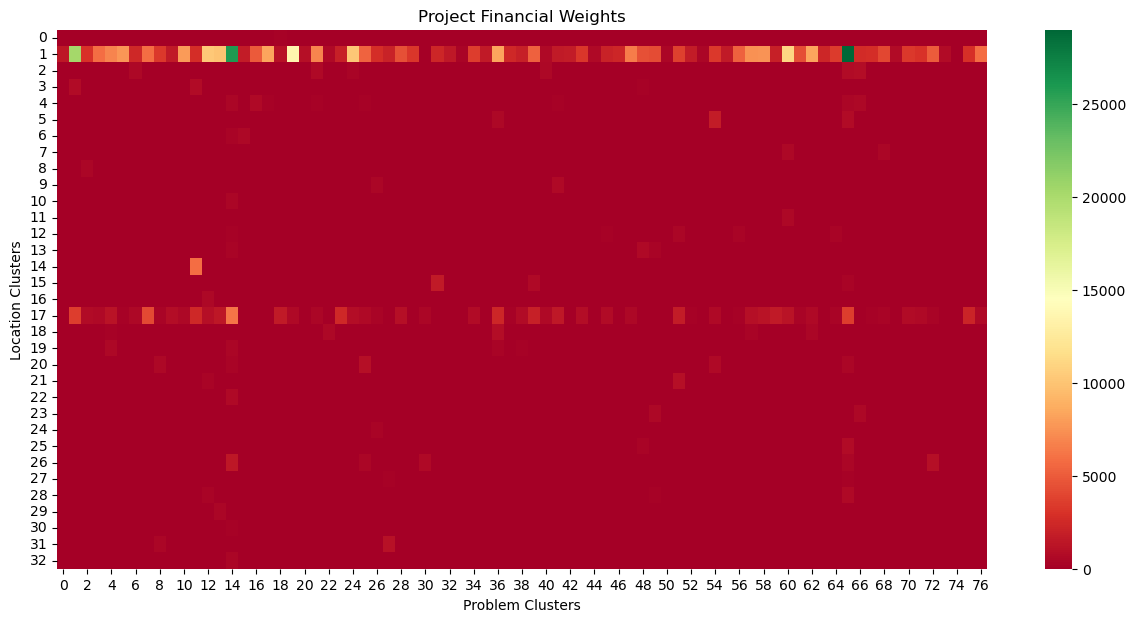

In [38]:
# Create a heatmap using Seaborn
plt.figure(figsize=(15, 7))

#sns.heatmap(matrix2Dfinances_df, annot=True, cmap='coolwarm', fmt=".2f")
#sns.heatmap(matrix2Dfinances_df, annot=False, cmap='coolwarm')
sns.heatmap(matrix2Dfinances_df, annot=False, cmap='RdYlGn')

plt.title('Project Financial Weights')
plt.ylabel('Location Clusters')
plt.xlabel('Problem Clusters')
plt.savefig('Project Financial Weights_HeatMap_GreenHigh.png')  # Save the heatmap as an image file
plt.show()

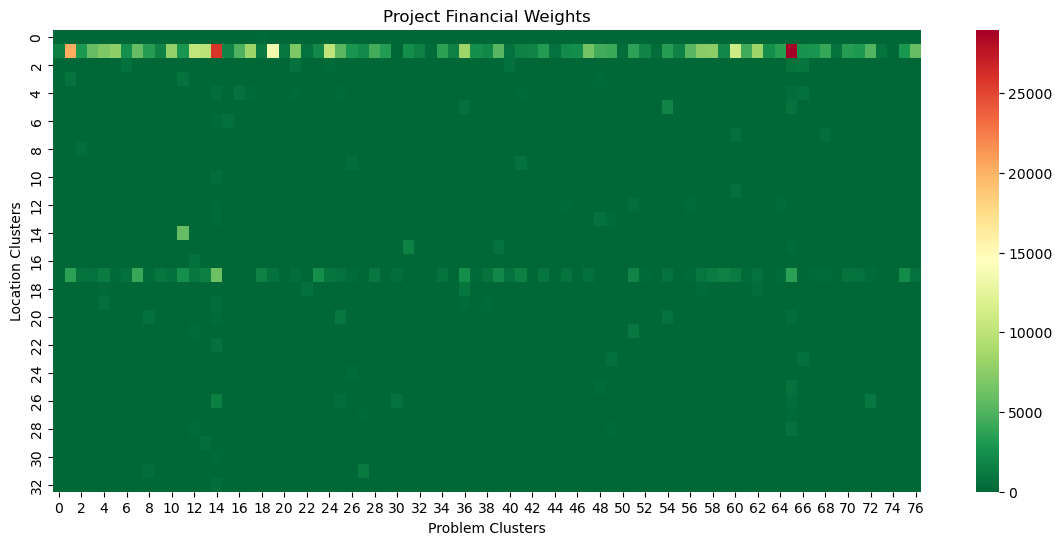

In [37]:
# Create a heatmap using Seaborn with the reversed colormap and without annotations
plt.figure(figsize=(14, 6))
sns.heatmap(matrix2Dfinances_df, annot=False, cmap='RdYlGn_r')

plt.title('Project Financial Weights')
plt.ylabel('Location Clusters')
plt.xlabel('Problem Clusters')
plt.savefig('Project Financial Weights_HeatMap_RedHigh.png')  # Save the heatmap as an image file
plt.show()

# Developing Aggregated Problem Description for each Cluster Cell

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
# Function for sentiment analysis
def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['compound']

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [24]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Load the T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')

# Function for text summarization using T5
def t5_summarize(text):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [34]:
# Initialize dictionaries to hold summarized content and sentiment scores
summarized_data = {}
un_summarized_data = {}
sentiment_scores = {}

# Iterate through each cell in the matrix
for problem_index, problem_row in enumerate(matrix2Dproblems):
    
    un_summarized_data[problem_index]={}
    
    for location_index, cell_problems in enumerate(problem_row):
        # Aggregate problem descriptions in the cell
        all_problems = ' '.join(cell_problems)
        
        if all_problems:
            
            #print("All Problem Aggregated: \n",all_problems)
            #print()
            
            # Dont Apply NLTK summarization on the combined text
            #summarized_problem = nltk_summarize(all_problems)
            
            
            # Apply T5 summarization on the combined text
            summarized_problem = t5_summarize(all_problems)
            
            # Sentiment Analysis (if needed)
            sentiment_score = analyze_sentiment(all_problems)
            
            # Prepare proposal content
            proposal_content = f"Project Proposal for Problem Cluster {problem_index} and Location Cluster {location_index}:\n"
            print(proposal_content)
            proposal_content += "Summarized Problem:\n"
            proposal_content += summarized_problem + "\n\n"
            proposal_content += "Sentiment Score: " + str(sentiment_score) + "\n"


        else:
            summarized_problem = ""
            sentiment_score = 0
            
            
        # Store summarized content and sentiment score in dictionaries
        if problem_index not in summarized_data:
            summarized_data[problem_index] = {}
            sentiment_scores[problem_index] = {}

        summarized_data[problem_index][location_index] = summarized_problem
        sentiment_scores[problem_index][location_index] = sentiment_score
        
        un_summarized_data[problem_index][location_index] = cell_problems
        
        

import winsound
winsound.Beep(300,700)
winsound.Beep(500,500)
winsound.Beep(700,300)

Project Proposal for Problem Cluster 0 and Location Cluster 1:

Project Proposal for Problem Cluster 1 and Location Cluster 1:

Project Proposal for Problem Cluster 1 and Location Cluster 3:

Project Proposal for Problem Cluster 1 and Location Cluster 4:

Project Proposal for Problem Cluster 1 and Location Cluster 17:

Project Proposal for Problem Cluster 2 and Location Cluster 1:

Project Proposal for Problem Cluster 2 and Location Cluster 5:

Project Proposal for Problem Cluster 2 and Location Cluster 8:

Project Proposal for Problem Cluster 2 and Location Cluster 17:

Project Proposal for Problem Cluster 3 and Location Cluster 1:

Project Proposal for Problem Cluster 3 and Location Cluster 17:

Project Proposal for Problem Cluster 4 and Location Cluster 1:

Project Proposal for Problem Cluster 4 and Location Cluster 17:

Project Proposal for Problem Cluster 4 and Location Cluster 18:

Project Proposal for Problem Cluster 4 and Location Cluster 19:

Project Proposal for Problem Clust

Project Proposal for Problem Cluster 39 and Location Cluster 1:

Project Proposal for Problem Cluster 39 and Location Cluster 15:

Project Proposal for Problem Cluster 39 and Location Cluster 17:

Project Proposal for Problem Cluster 40 and Location Cluster 1:

Project Proposal for Problem Cluster 40 and Location Cluster 2:

Project Proposal for Problem Cluster 40 and Location Cluster 17:

Project Proposal for Problem Cluster 41 and Location Cluster 1:

Project Proposal for Problem Cluster 41 and Location Cluster 4:

Project Proposal for Problem Cluster 41 and Location Cluster 9:

Project Proposal for Problem Cluster 41 and Location Cluster 17:

Project Proposal for Problem Cluster 42 and Location Cluster 1:

Project Proposal for Problem Cluster 43 and Location Cluster 1:

Project Proposal for Problem Cluster 43 and Location Cluster 17:

Project Proposal for Problem Cluster 44 and Location Cluster 1:

Project Proposal for Problem Cluster 45 and Location Cluster 1:

Project Proposal for

In [35]:
# Create Excel sheets using Pandas DataFrame and export them to Excel files

# Convert summarized data to DataFrame
summarized_df = pd.DataFrame(summarized_data)
summarized_df.to_excel('SummarizedContent_LocationsRow_ProblemColumn.xlsx', index=True)

# Convert un_summarized data to DataFrame
un_summarized_df = pd.DataFrame(un_summarized_data)
un_summarized_df.to_excel('UN_SummarizedContent_LocationsRow_ProblemColumn.xlsx', index=True)

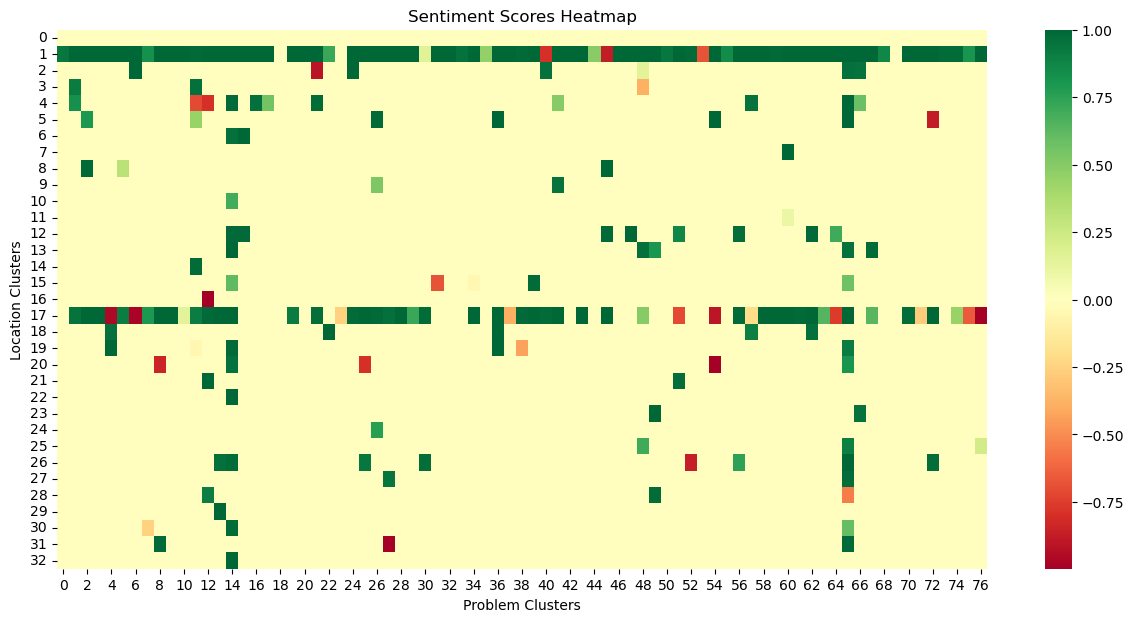

In [36]:
# Convert sentiment scores to DataFrame
sentiment_df = pd.DataFrame(sentiment_scores)
sentiment_df.to_excel('SentimentScores_LocationsRows_ProblemColumns.xlsx', index=True)

# import seaborn as sns
# import matplotlib.pyplot as plt

# Assuming sentiment_scores is your DataFrame with sentiment scores

# Create a heatmap using Seaborn
plt.figure(figsize=(15, 7))
#sns.heatmap(sentiment_df, annot=True, cmap='coolwarm', fmt=".2f")
sns.heatmap(sentiment_df, annot=False, cmap='RdYlGn')
plt.title('Sentiment Scores Heatmap')
plt.ylabel('Location Clusters')
plt.xlabel('Problem Clusters')
plt.savefig('SentimentScores_HeatMap_RedHigh.png')  # Save the heatmap as an image file
plt.show()

# Storing the final results in Excel FIles

In [29]:
# Create Excel sheets using Pandas DataFrame and export them to Excel files
merged_dataset.to_excel('Final Clustering Allocation.xlsx', index=True)

merged_dataset

,Problem_Description,Geographical_Location,Financial_Weight,Problem_Category_Numeric,Problem_Category_Words,Location_Category_Numeric,Location_Category_Words
0,"Ageing, the process of human aging is now bein...",Worldwide,333.333333,6,"[is, research, why, one, the, of, to, and, thi...",17,"[india, city, रद, hindi, sanctuaries]"
1,The reservation policy of implementation of 10...,India,160.979946,72,"[reservation, the, be, will, to, and, for, of,...",1,"[india, ರದ, italy, ideas, ignou]"
2,For Budget 2023-24\n II thnk govt.should looki...,India,293.896132,13,"[to, budget, and, the, should, of, government,...",1,"[india, ರದ, italy, ideas, ignou]"
3,Student ko sabhi jagah dikat aati hai,"aati, hai",19.934181,11,"[hai, ki, ke, ko, bhi, se, aur, ka, me, ho, ek...",14,"[hai, karna, nhi, kam, kirpa]"
4,Agriculture Me Jo paisa sabhi ko milta hai vo ...,hai,160.988016,11,"[hai, ki, ke, ko, bhi, se, aur, ka, me, ho, ek...",14,"[hai, karna, nhi, kam, kirpa]"
...,...,...,...,...,...,...,...
3417,In the Tax tribunals and tax cases in HC and S...,HC,14.219829,62,"[the, to, be, of, tax, will, should, and, or, ...",17,"[india, city, रद, hindi, sanctuaries]"
3418,"I don't want to waste time. Just, I want India...","India, India, India",35.396612,14,"[and, the, to, of, in, for, is, can, this, ind...",1,"[india, ರದ, italy, ideas, ignou]"
3419,"Why only the important visits ie, monuments an...",India,160.331489,16,"[of, and, be, the, public, on, measures, shoul...",1,"[india, ರದ, italy, ideas, ignou]"
3420,My life is my health because it is said that h...,India,25.386481,25,"[health, insurance, is, to, the, of, and, we, ...",1,"[india, ರದ, italy, ideas, ignou]"
